In [3]:
import sys
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.signal import cwt,ricker
from scipy import stats
from sklearn.preprocessing import StandardScaler,normalize
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.optimizers
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.models import load_model
from tensorflow.keras.layers import Flatten,concatenate,Layer,Dense,LSTM,Activation,MaxPooling2D,Dropout,Conv2D,BatchNormalization,Reshape,UpSampling2D,ZeroPadding2D

In [4]:
random.seed(1314)

def Mean(data):
    return np.mean(data,axis=1)

def Std(data):
    return np.std(data,axis=1)

def Var(data):
    return np.var(data,axis=1)

print(sys.version)

3.9.12 (main, Apr  5 2022, 06:56:58) 
[GCC 7.5.0]


In [5]:
#!pip3 install --upgrade tensorflow


Preset Data

In [10]:
random_data = np.random.randint(10, size=(10240,100, 1) )

wiki plot: https://en.wikipedia.org/wiki/Activation_function#cite_note-15


library: https://www.tensorflow.org/api_docs/python/tf/keras/activations

graphs:https://mlfromscratch.com/activation-functions-explained/

# Mean

In [11]:
feature_data = Mean(random_data)

In [80]:
# best performance and time: relu ,softplus(the best one, 
# slower but also works:  gelu, swish
# activation functions with exponentials will not work on mean where the points have big slope changes do not fit.
mean_model = None
mean_model = Sequential([
    keras.layers.Flatten(input_shape=(100,1)),
#     keras.layers.Dense(128, activation= 'softplus'),
    keras.layers.Dense(64, activation= 'softplus'),
    keras.layers.Dense(32,activation= 'softplus'),
    keras.layers.Dense(16,activation= 'softplus'),
    keras.layers.Dense(8,activation= 'softplus'),
    keras.layers.Dense(4,activation= 'softplus'),
    keras.layers.Dense(2,activation= 'softplus'),
    keras.layers.Dense(1,activation= 'linear')
    
])

mean_model.compile(optimizer="adam", loss="mean_squared_error")


In [6]:
#mean_model.fit(random_data, feature_data, epochs= 50)

In [8]:
# Predirect_arr = np.random.randint(10, size=(30,100, 1))
# plt.plot(range(30),np.mean(Predirect_arr, axis=1),range(30),mean_model.predict(Predirect_arr))

In [27]:
mean_LSTMmodel = Sequential()

mean_LSTMmodel.add(LSTM(40,input_shape=(100,1),activation='relu'))
#std_LSTMmodel.add(LSTM(200,activation ='relu'))
#mean_LSTMmodel.add(Dense(20, activation ='relu'))
mean_LSTMmodel.add(Dense(1, activation ='linear'))


mean_LSTMmodel.compile(optimizer="adam", loss="mean_squared_error")


In [129]:
#mean_LSTMmodel = load_model('./Models2meanLSTM.h5')
#mean_LSTMmodel.fit(random_data, feature_data, epochs= 200)

In [32]:
mean_LSTMmodel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 40)                6720      
                                                                 
 dense_4 (Dense)             (None, 1)                 41        
                                                                 
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 31ms/step


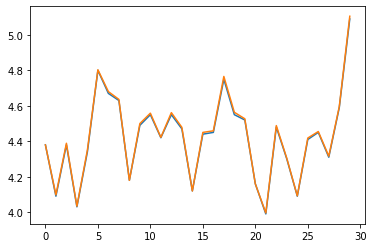

In [37]:
Predirect_arr = np.random.randint(10, size=(30,100, 1))

plt.plot(range(30),np.mean(Predirect_arr, axis=1),range(30),mean_LSTMmodel.predict(Predirect_arr))

In [38]:
mean_LSTMmodel.save("./Models2meanLSTM.h5")

# STD

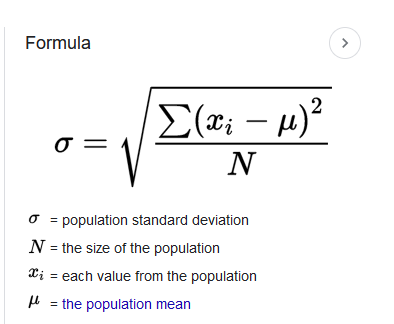

In [85]:
random_data2 = np.random.randint(10, size=(10000,150, 1) )

In [86]:
feature_data = Std(random_data2)

In [86]:
# good performance: 
# not work: softplus elu gelu selu softsign swish tanh
std_model = Sequential([
    keras.layers.Flatten(input_shape=(40,1)),
    #BatchNormalization(),
    keras.layers.Dense(100, activation= 'relu'),
    #BatchNormalization(),
    keras.layers.Dense(200,activation= 'relu'),
    keras.layers.Dense(350,activation= 'relu'),
    #BatchNormalization(),
    keras.layers.Dense(520,activation= 'relu'),
    keras.layers.Dense(300,activation= 'relu'),
    keras.layers.Dense(200,activation= 'relu'),
    #BatchNormalization(),
    keras.layers.Dense(100,activation= 'relu'),
    keras.layers.Dense(50,activation= 'relu'),
    keras.layers.Dense(20,activation= 'relu'),
    keras.layers.Dense(10,activation= 'relu'),
    keras.layers.Dense(4,activation= 'relu'),
    keras.layers.Dense(1,activation= 'linear')
    
])

std_model.compile(optimizer="adam", loss="mean_squared_error")


In [141]:
#std_model.fit(random_data2, feature_data, epochs= 2000)

In [23]:
Predirect_arr = np.random.randint(10, size=(30,40, 1))
plt.plot(range(30),np.std(Predirect_arr, axis=1),range(30),std_model.predict(Predirect_arr))

NameError: name 'std_model' is not defined

In [92]:
std_model.save("./Models/Models2std11hiddenlongwidthfinal.h5")

LSTM model

In [111]:
std_LSTMmodel = Sequential()

std_LSTMmodel.add(LSTM(80,input_shape=(150,1),activation='relu',return_sequences = True))
#std_LSTMmodel.add(Dropout(0.2))
std_LSTMmodel.add(LSTM(80,activation ='relu',return_sequences = False))
#std_LSTMmodel.add(LSTM(30,activation ='relu'))
#std_LSTMmodel.add(Dropout(0.2))
#std_LSTMmodel.add(Dense(20, activation ='relu'))
std_LSTMmodel.add(Dense(1, activation ='linear'))

In [112]:
std_LSTMmodel.compile(optimizer="adam", loss="mean_squared_error")

In [113]:
#std_LSTMmodel = load_model('./Models2stdLSTM2*80Input50.h5')

In [124]:
std_LSTMmodel.summary()
#std_LSTMmodel.fit(random_data2, feature_data, epochs= 100)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 150, 80)           26240     
                                                                 
 lstm_24 (LSTM)              (None, 80)                51520     
                                                                 
 dense_13 (Dense)            (None, 1)                 81        
                                                                 
Total params: 77,841
Trainable params: 77,841
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 68ms/step


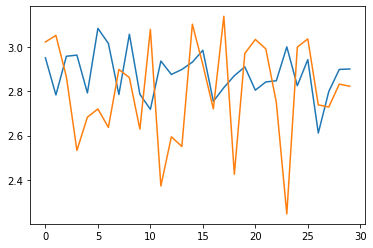

In [125]:
Predirect_arr = np.random.randint(10, size=(30,150, 1))
plt.plot(range(30),np.std(Predirect_arr, axis=1),range(30),std_LSTMmodel.predict(Predirect_arr))

In [126]:
std_LSTMmodel.save("./Models2stdLSTM3*80Input150LSTMONLY.h5")

In [127]:
# std_LSTMmodel = load_model('./Models2stdLSTM3*30Input150.h5')
# plt.plot(range(30),np.std(Predirect_arr, axis=1),range(30),std_LSTMmodel.predict(Predirect_arr))

# Variance

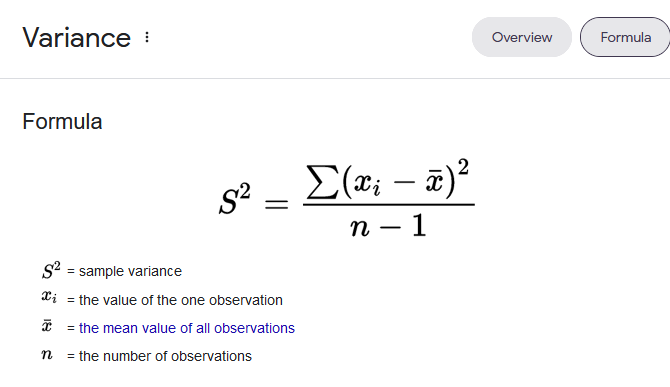

In [113]:
random_data3 = np.random.randint(10, size=(20000,40, 1) )

In [114]:
feature_data = Var(random_data3)

https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [115]:
# relu alone does not work when a big change in slope, elu seems working well, swish selu, elu
# not work: softsign, softplus
#var_model = load_model('./Models/Models2var.h5')
var_model = Sequential([
    # kernel_initializer="glorot_uniform"
    keras.layers.Flatten(input_shape=(40,1)),
    #keras.layers.BatchNormalization(),
#     keras.layers.Dense(512,activation= 'swish'),
#     keras.layers.Dense(128,activation= 'relu'),
    keras.layers.Dense(80,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(100,activation= 'selu'),
    keras.layers.Dense(250,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(400,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(350,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(200,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(150,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(120,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(80,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(50,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(30,activation= 'selu'),
    keras.layers.Dense(8,activation= 'selu'),
    
    keras.layers.Dense(1,activation= 'linear'),
    
])

var_model.compile(optimizer="adam", loss="mean_squared_error")

In [140]:
# optimizer = keras.optimizers.Adam()
# var_model.compile(optimizer=optimizer, loss="mean_squared_error")
#var_model.fit(random_data3, feature_data, epochs= 300)

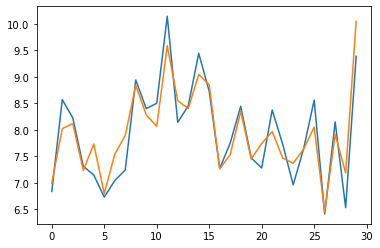

In [156]:
#var_model = load_model('./Models/Models2varfinal.h5')
Predirect_arr = np.random.randint(10, size=(30,40, 1))

plt.plot(range(30),np.var(Predirect_arr, axis=1),range(30),var_model.predict(Predirect_arr))

In [139]:
var_model.save("./Models/Models2varfinal.h5")

# OutPut Mean and Std

In [184]:
random_data4 = np.random.randint(20, size=(10000,100, 1) )

In [185]:
feature_mean =  Mean(random_data4)
feature_std = Std(random_data4)
X_out = np.concatenate([feature_mean, feature_std],axis=1)
print(feature_mean.shape)
print(feature_std.shape)
print(X_out.shape)


(10000, 1)
(10000, 1)
(10000, 2)


In [186]:
mean_std_model = Sequential()

mean_std_model.add(LSTM(20,input_shape=(100,1),activation='relu',return_sequences = True))
#mean_std_model.add(Dropout(0.2))
mean_std_model.add(LSTM(20,activation ='relu',return_sequences = True))
#mean_std_model.add(Dropout(0.2))
mean_std_model.add(LSTM(20,activation ='relu'))
mean_std_model.add(Dense(10, activation ='relu'))

mean_std_model.add(Dense(2, activation ='linear'))

mean_std_model.compile(optimizer="adam", loss="mean_squared_error")

In [187]:
mean_std_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_76 (LSTM)               (None, 100, 20)           1760      
_________________________________________________________________
lstm_77 (LSTM)               (None, 100, 20)           3280      
_________________________________________________________________
lstm_78 (LSTM)               (None, 20)                3280      
_________________________________________________________________
dense_52 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_53 (Dense)             (None, 2)                 22        
Total params: 8,552
Trainable params: 8,552
Non-trainable params: 0
_________________________________________________________________


In [128]:

# mean_std_model.fit(random_data4, X_out, epochs= 200)

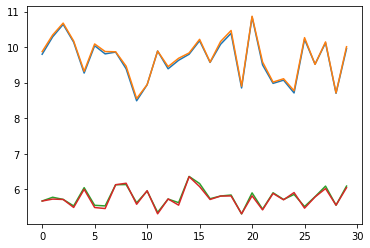

In [204]:
Predirect_arr = np.random.randint(20, size=(30,100, 1))
plt.plot(range(30),np.mean(Predirect_arr, axis=1),range(30),mean_std_model.predict(Predirect_arr).T[0])
plt.plot(range(30),np.std(Predirect_arr, axis=1),range(30),mean_std_model.predict(Predirect_arr).T[1])

In [205]:
mean_std_model.save("./Models2LSTMmean_std.h5")